# Tent & Norm Adaptation

In [20]:
import pandas as pd

record = pd.read_csv('./result/audio-mnist/tent/pre_train/training_records.csv')
record.head()

,Unnamed: 0,type,step,accuracy,loss
0,0,train,0,9.3750,2.302691
1,1,train,1,7.8125,2.302774
2,2,train,2,9.3750,2.299775
3,3,train,3,18.7500,2.292776
4,4,train,4,14.0625,2.299582


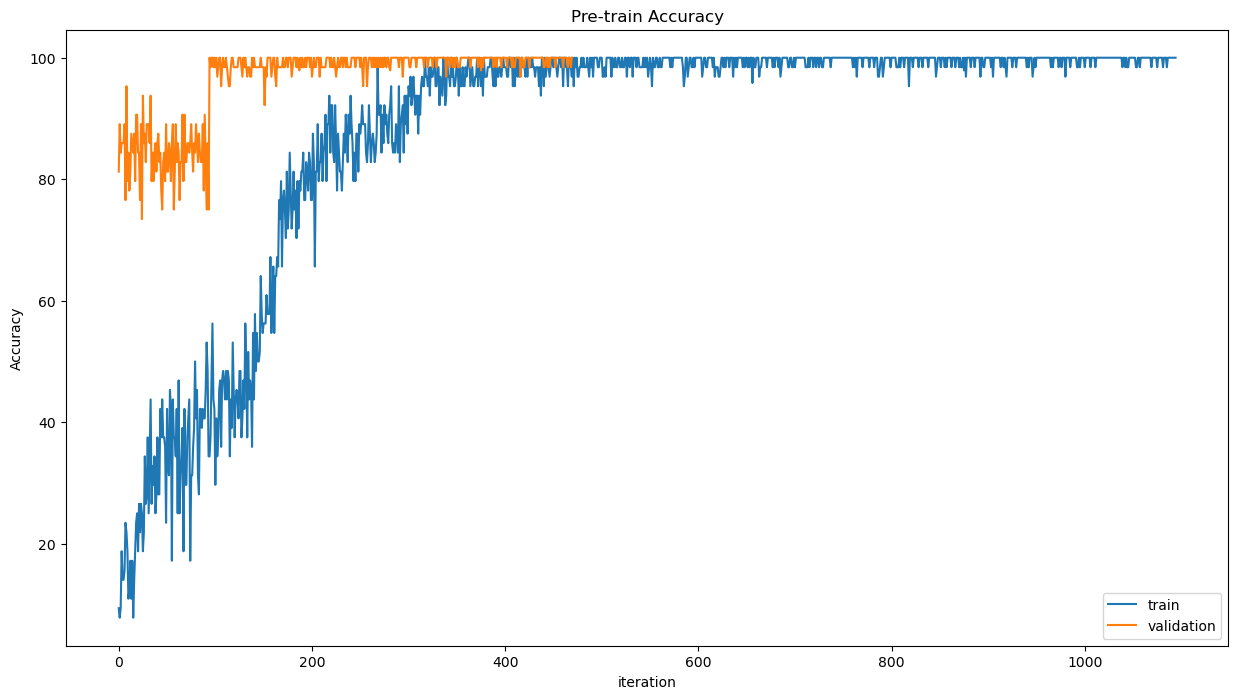

In [21]:
import matplotlib.pyplot as plt

train_record = record[record['type'] == 'train']
val_record = record[record['type'] == 'validation']
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['accuracy'], label='train')
plt.plot(val_record['step'], val_record['accuracy'], label='validation')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.title('Pre-train Accuracy')
plt.legend(loc='lower right')
plt.show()

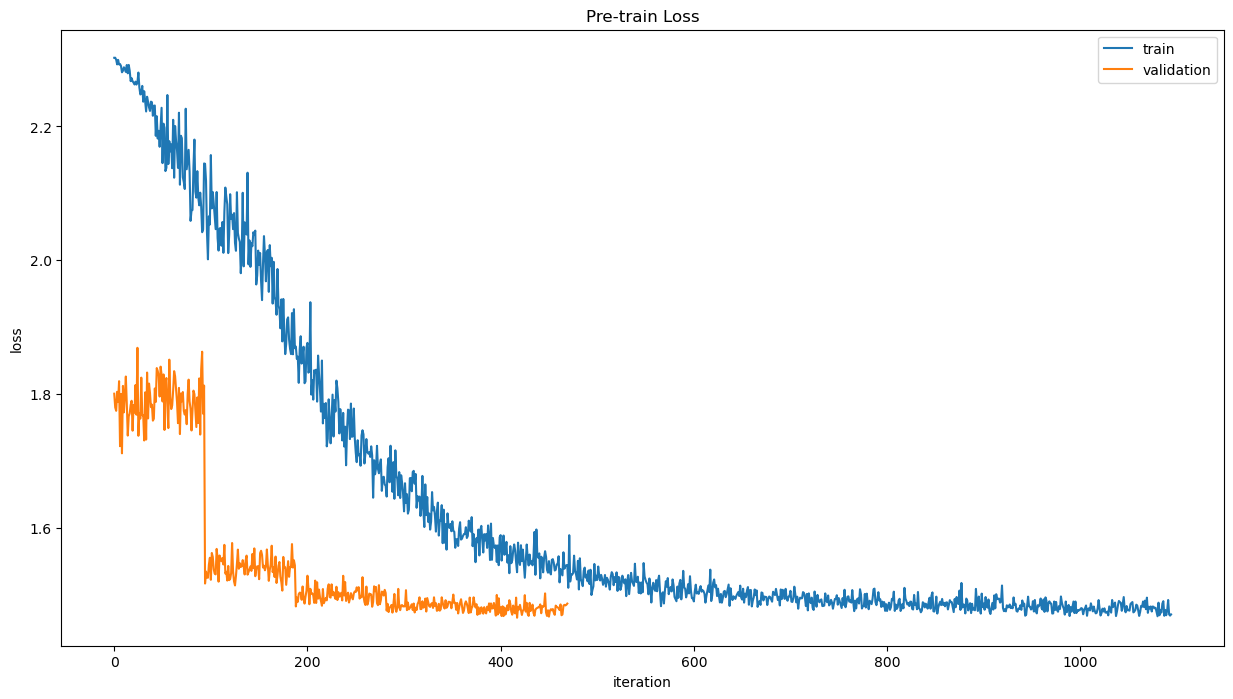

In [22]:
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['loss'], label='train')
plt.plot(val_record['step'], val_record['loss'], label='validation')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Pre-train Loss')
plt.legend()
plt.show()

# Test-Time Training (TTT)

In [23]:
record = pd.read_csv('./result/audio-mnist/ttt/pre_time_shift_train/ts_bn_accu_record.csv')
record.head()

,Unnamed: 0,dataset,type,step,accuracy,loss
0,0,audio-mnist,cls,0,10.317460,2.365511
1,1,audio-mnist,ssh,0,38.359788,1.096718
2,2,audio-mnist,cls,1,11.111111,2.283417
3,3,audio-mnist,ssh,1,74.074074,0.809246
4,4,audio-mnist,cls,2,15.873016,2.236067


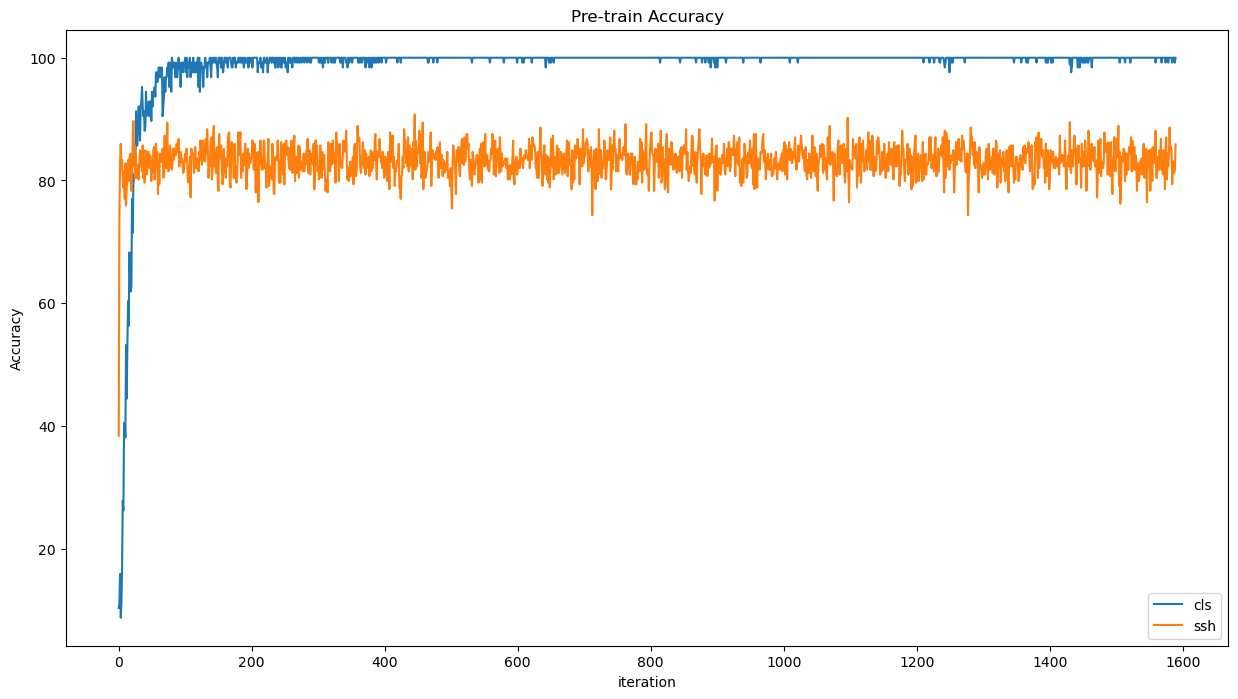

In [24]:
train_record = record[record['type'] == 'cls']
val_record = record[record['type'] == 'ssh']
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['accuracy'], label='cls')
plt.plot(val_record['step'], val_record['accuracy'], label='ssh')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.title('Pre-train Accuracy')
plt.legend(loc='lower right')
plt.show()

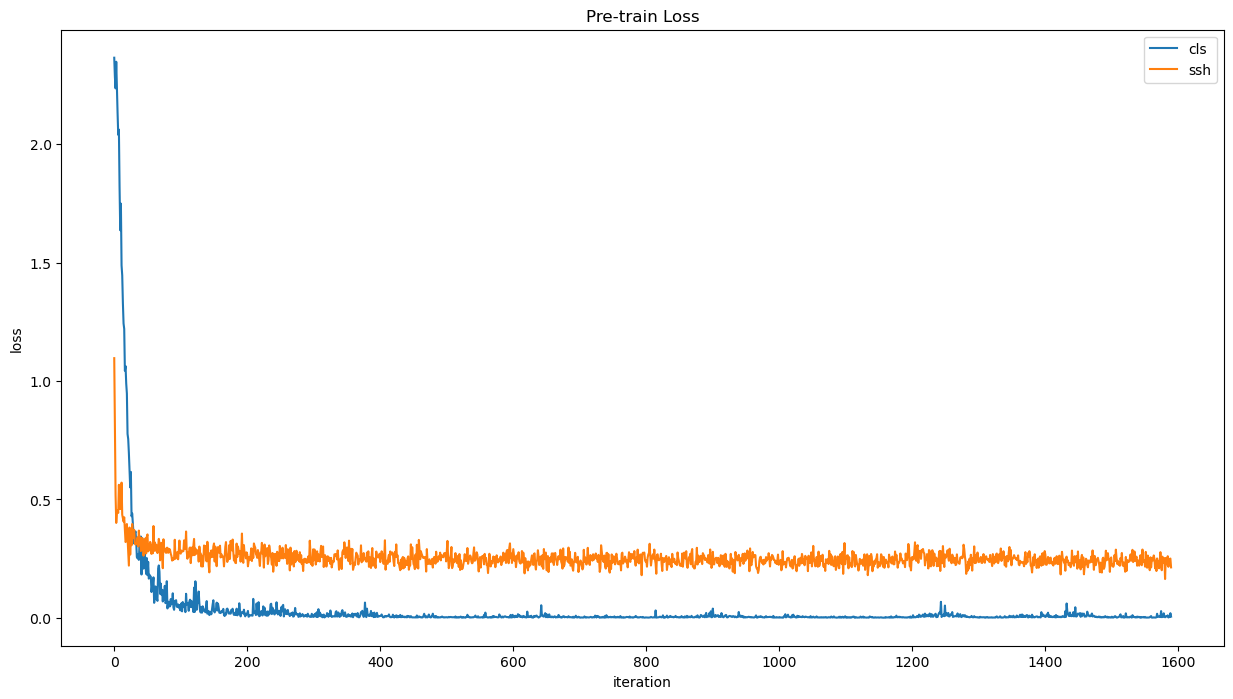

In [25]:
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['loss'], label='cls')
plt.plot(val_record['step'], val_record['loss'], label='ssh')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Pre-train Loss')
plt.legend()
plt.show()

# Test dataset accuracy comparing

In [26]:
import os

def combine_csvs(root_path: str) -> pd.DataFrame:
    records = []
    for sub_path in os.listdir(root_path):
        if 'accuracy_record' in sub_path and sub_path.endswith('.csv'):
            record = pd.read_csv(os.path.join(root_path, sub_path), index_col=0)
            records.append(record)
    return pd.concat(records, axis=0, ignore_index=True)

tent_analysis_root_path = './result/audio-mnist/tent/analysis'
tent_analysis_records = combine_csvs(tent_analysis_root_path)
tent_analysis_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,cnn,NaN,NaN,94.39,5.61,0.0000,25404
1,audio-mnist,cnn,NaN,gaussian_noise,10.25,89.75,0.0025,25404
2,audio-mnist,cnn,Tent Adaptation,gaussian_noise,82.47,17.53,0.0025,25404
3,audio-mnist,cnn,Norm Adaptation,gaussian_noise,80.83,19.17,0.0025,25404
4,audio-mnist,cnn,NaN,NaN,94.07,5.93,0.0000,25404
5,audio-mnist,cnn,NaN,gaussian_noise,10.01,89.99,0.0050,25404
6,audio-mnist,cnn,Tent Adaptation,gaussian_noise,70.02,29.98,0.0050,25404
7,audio-mnist,cnn,Norm Adaptation,gaussian_noise,69.42,30.58,0.0050,25404
8,audio-mnist,restnet50,normalized,NaN,98.36,1.64,0.0000,25567042
9,audio-mnist,restnet50,normalized,gaussian_noise,60.49,39.51,0.0025,25567042


In [27]:
ttt_analysis_root_path = './result/audio-mnist/ttt/time_shift_analysis'
ttt_time_shift_records = combine_csvs(ttt_analysis_root_path)
ttt_analysis_root_path = './result/audio-mnist/ttt/angles_shift_analysis'
ttt_angles_shift_records = combine_csvs(ttt_analysis_root_path)
ttt_analysis_records = pd.concat([ttt_time_shift_records, ttt_angles_shift_records], axis=0, ignore_index=True)
ttt_analysis_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,RestNet_base,NaN,NaN,96.27,3.73,0.0000,737005
1,audio-mnist,RestNet_base,NaN,gaussian_noise,37.66,62.34,0.0050,737005
2,audio-mnist,RestNet_base,"TTT, ts, bn, online",gaussian_noise,60.17,39.83,0.0050,737005
3,audio-mnist,RestNet_base,NaN,NaN,96.34,3.66,0.0000,737005
4,audio-mnist,RestNet_base,NaN,gaussian_noise,48.46,51.54,0.0025,737005
5,audio-mnist,RestNet_base,"TTT, ts, bn, online",gaussian_noise,71.48,28.52,0.0025,737005
6,audio-mnist,RestNet_base,NaN,NaN,98.43,1.57,0.0000,740078
7,audio-mnist,RestNet_base,NaN,gaussian_noise,60.99,39.01,0.0025,740078
8,audio-mnist,RestNet_base,"TTT, as, bn, online",gaussian_noise,74.35,25.65,0.0025,740078
9,audio-mnist,RestNet_base,NaN,NaN,98.49,1.51,0.0000,740078


In [28]:
conmix_analysis_root_path = './result/audio-mnist/CoNMix/analysis'
conmix_analysis_records = combine_csvs(conmix_analysis_root_path)
conmix_analysis_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,ViT,NaN,NaN,97.46,2.54,0.0000,103687828
1,audio-mnist,ViT,NaN,gaussian_noise,64.27,35.73,0.0050,103687828
2,audio-mnist,ViT,NaN,gaussian_noise,94.80,5.20,0.0050,103687828
3,audio-mnist,ViT,NaN,NaN,97.46,2.54,0.0000,103687828
4,audio-mnist,ViT,NaN,gaussian_noise,79.09,20.91,0.0025,103687828
